<a href="https://colab.research.google.com/github/RishiLal/CV-FirstHtmlTemplate/blob/main/MLB_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import required libraries
import torch
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [18]:
# Define the transformation
transform = transforms.Compose([transforms.ToTensor()])
# Load the MNIST dataset
train_data = datasets.MNIST(root="data", train=True, transform=transform, download=True)
test_data = datasets.MNIST(root="data", train=False, transform=transform, download=True)

Epoch [1/5], Loss: 0.3839
Epoch [2/5], Loss: 0.1586
Epoch [3/5], Loss: 0.1096
Epoch [4/5], Loss: 0.0834
Epoch [5/5], Loss: 0.0657
Accuracy: 97.44%


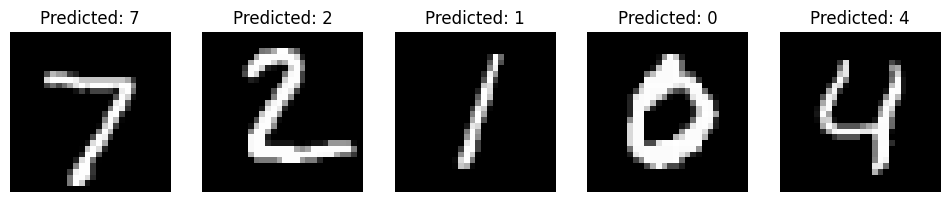

In [19]:
# Create data loaders
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)        # Hidden layer
        self.fc3 = nn.Linear(64, 10)         # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initializing the model, loss function, and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # resets the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss between the predictions and the true labels
        loss.backward()  # computing the gradients of the loss with respect to the predictions
        optimizer.step()  # Update the weights
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Test the model
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

# Visualize some predictions
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

# Display images and predicted labels
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for z in range(5):
    axes[z].imshow(images[z].numpy().squeeze(), cmap='gray')
    axes[z].set_title(f'Predicted: {predicted[z].item()}')
    axes[z].axis('off')
plt.show()